In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

In [ ]:
df=pd.read_csv('scraping3.csv',header=0)

1°correction de quelques colones et changement du type de quelques colones

In [ ]:
df['telephone du vendeur']=df['telephone du vendeur'].fillna(0).astype(int)

In [ ]:
#CHANGEMENT DU TYPE DE PRIX EN FLOAT
df['prix']=df['prix'].str.replace(' ','')
df.loc[df['prix']=='?']=''
df['prix']=pd.to_numeric(df['prix'],errors='coerce')

In [ ]:

l=[0 for i in range(6903)]
zero=pd.DataFrame(l)
zero[0]=zero[0].astype(str)
df['telephone du vendeur']=df['telephone du vendeur'].astype(str)
df['telephone du vendeur']=zero[0]+df['telephone du vendeur']

In [ ]:
#ajout de 2 colonnes 'kilo_inf' et 'kilo_max'
df['kilo_inf']=df['kilométrage'].str.split('-').str[0]
df['kilo_max']=df['kilométrage'].str.split('-').str[1]

In [ ]:
s=df['date de publication']
datetime_index = pd.DatetimeIndex(s.values)
df['date de publication']=pd.to_datetime(df['date de publication'])
df['mois']=datetime_index.month
df['année']=datetime_index.year
df['jour']=datetime_index.day
df['heure']=datetime_index.hour
df['minute']=datetime_index.minute

In [ ]:
#les voitures automatiques
L=df[df['boite à vitesse']=='automatique']['ville']
#nombre d'annonces de voitures par ville
s_ville=df.groupby('ville')['telephone du vendeur'].count()
#classement des villes par nombre d'annonce
s_v_tr=s_ville.sort_values(ascending=False)
#nombre d'annonce de voiture par marque
s_marque=df.groupby('marque')['ville'].count()
#classement des villes par nombre d'annonce
s_marque_tri=s_marque.sort_values(ascending=False)

In [ ]:
print(L)
print(s_ville)
print(s_v_tr)
print(s_marque)
print(s_marque_tri)

6        Casablanca
17        Marrakech
20       Casablanca
48              Fès
72           Agadir
           ...     
8651     Casablanca
8687          Oujda
8692         Agadir
8701            Fès
8712            Fès
Name: ville, Length: 878, dtype: object
ville
                        2002
 Aarab Sebbah Gheris       4
 Aarab Sebbah Ziz          1
 Afourar                   1
 Agadir                  235
                        ... 
 Youssoufia               10
 Zagora                    1
 Zaïo                      1
 Zeghanghane               1
 Zemamra                   1
Name: telephone du vendeur, Length: 176, dtype: int64
ville
                           2002
 Casablanca                1466
 Rabat                      416
 Tanger                     378
 Fès                        332
                           ... 
 Aoulouz                      0
 Missour                      0
 Bouarfa                      0
 Bejaad                       0
 Sidi Moussa El Majdoub       0
Nam

In [ ]:
#nombre de voiture classée par marque appartenant au meme vendeur 
tel_mar=df.groupby(['telephone du vendeur','marque']).count()
#nombre de modèle pour chaque marque 
mar_mod=df.groupby(['marque','modèle']).count()

In [ ]:
#les vendeurs ayant 2 annonces de voiture de marques différentes 

level1=tel_mar.index.get_level_values('telephone du vendeur')
te_2marque=[]
for i in level1:
    v=tel_mar.loc[i]
    idxe=v.index
    if len(idxe)==2:
        te_2marque.append(i)
te_2marque

ensemble=set(te_2marque) #l'ensemble qui contient le num tel de ces vendeurs (je considére le vendeur est identifié par son numéro de téléphone et on peut négliger les vendeurs n'ayant pas de numéro de téléphone) 
ensemble

{'0522268791',
 '0600054788',
 '0600087661',
 '0600316929',
 '0600528080',
 '0600724742',
 '0600867334',
 '0601009226',
 '0601567172',
 '0601992702',
 '0602325396',
 '0602774072',
 '0603012268',
 '0603129661',
 '0604519200',
 '0604621470',
 '0604738813',
 '0605238435',
 '0606826880',
 '0608104915',
 '0608531463',
 '0608708768',
 '0608898416',
 '0610650975',
 '0611203971',
 '0611321539',
 '0612126500',
 '0612800591',
 '0613062400',
 '0613069195',
 '0613152353',
 '0613396909',
 '0613759654',
 '0613828483',
 '0614568663',
 '0614704209',
 '0614985088',
 '0615377263',
 '0616134846',
 '0618238583',
 '0618374031',
 '0619811713',
 '0620014762',
 '0620350555',
 '0622313134',
 '0622354104',
 '0622653014',
 '0622825471',
 '0626518100',
 '0627020173',
 '0627775056',
 '0630685102',
 '0631199200',
 '0631307279',
 '0631709108',
 '0631970428',
 '0633221403',
 '0633493878',
 '0634566909',
 '0635889868',
 '0636871055',
 '0637534672',
 '0639073996',
 '0639218592',
 '0639441252',
 '0639548544',
 '06397491

In [ ]:
#les annonces n'ayant pas de numéro de téléphone

empty_numtel=df.loc[np.where(df['telephone du vendeur'].isin([np.nan]))]
empty_numtel


,ville,secteur,marque,modèle,année modèle,carburant,boite à vitesse,puissance fiscale,kilométrage,date de publication,...,prix,telephone du vendeur,type annonce,kilo_inf,kilo_max,mois,année,jour,heure,minute
6903,,,,,,,,,,NaT,...,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN
6904,Temara,vide,Nissan,BLUEBIRD,2000,Diesel,NaN,8 CV,25 000 - 29 999,2020-03-16 16:20:20,...,30000.0,NaN,NaN,25 000,29 999,3.0,2020.0,16.0,16.0,20.0
6905,Kénitra,vide,Renault,12,2012,Diesel,manuelle,6 CV,0 - 4 999,2020-03-16 16:20:20,...,20800.0,NaN,NaN,0,4 999,3.0,2020.0,16.0,16.0,20.0
6906,Tanger,vide,Renault,Super 5,1987,Electrique,NaN,6 CV,40 000 - 44 999,2020-03-16 16:20:17,...,85000.0,NaN,NaN,40 000,44 999,3.0,2020.0,16.0,16.0,20.0
6907,Rabat,vide,Ford,Fiesta,2012,Diesel,NaN,7 CV,40 000 - 44 999,2020-03-16 16:20:08,...,6000.0,NaN,NaN,40 000,44 999,3.0,2020.0,16.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8709,Azrou,vide,Citroen,C15,2000,Diesel,manuelle,6 CV,180 000 - 189 999,2020-03-14 19:49:18,...,14500.0,NaN,NaN,180 000,189 999,3.0,2020.0,14.0,19.0,49.0
8710,El Jadida,vide,Dacia,Dokker,2014,Diesel,NaN,6 CV,140 000 - 149 999,2020-03-14 19:49:15,...,33000.0,NaN,NaN,140 000,149 999,3.0,2020.0,14.0,19.0,49.0
8711,Casablanca,vide,Citroen,C15,1999,Diesel,manuelle,7 CV,0 - 4 999,2020-03-14 19:49:09,...,73000.0,NaN,NaN,0,4 999,3.0,2020.0,14.0,19.0,49.0
8712,Fès,vide,Citroen,DS5,2019,Diesel,automatique,8 CV,10 000 - 14 999,2020-03-14 19:48:08,...,30000.0,NaN,NaN,10 000,14 999,3.0,2020.0,14.0,19.0,48.0


In [ ]:
#combien de ces derniers sont de type professionnel et d'autre particulier
empty_numtel.groupby('type annonce').count()['ville']

type annonce
                            437
ANNONCE DE PROFESSIONNEL    149
Name: ville, dtype: int64

In [ ]:

#les offres non sérieuse ou truqué de voitures 
offre=df.sort_values(['prix','année modèle','kilo_max','puissance fiscale'],ascending=[True,False,True,False])
offre

,ville,secteur,marque,modèle,année modèle,carburant,boite à vitesse,puissance fiscale,kilométrage,date de publication,...,prix,telephone du vendeur,type annonce,kilo_inf,kilo_max,mois,année,jour,heure,minute
1814,Agadir,Tamraght,Fiat,127,1983,Essence,manuelle,5 CV,15 000 - 19 999,2020-03-31 15:59:53,...,4000.0,0610880256,NaN,15 000,19 999,3.0,2020.0,31.0,15.0,59.0
1387,Agadir,vide,Kia,Picanto,2010,Essence,NaN,6 CV,75 000 - 79 999,2020-04-02 00:12:26,...,4500.0,0706218131,NaN,75 000,79 999,4.0,2020.0,2.0,0.0,12.0
5494,Rabat,Hay el Fath,Fiat,500,2016,Diesel,NaN,5 CV,45 000 - 49 999,2020-03-18 16:48:39,...,6000.0,0641274562,ANNONCE DE PROFESSIONNEL,45 000,49 999,3.0,2020.0,18.0,16.0,48.0
6907,Rabat,vide,Ford,Fiesta,2012,Diesel,NaN,7 CV,40 000 - 44 999,2020-03-16 16:20:08,...,6000.0,NaN,NaN,40 000,44 999,3.0,2020.0,16.0,16.0,20.0
7718,Berrechid,Toute la ville,Mercedes-Benz,190,1989,Diesel,NaN,vide,400 000 - 449 999,2020-03-15 18:58:33,...,7000.0,NaN,NaN,400 000,449 999,3.0,2020.0,15.0,18.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,,,,,,,,,,NaT,...,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN
8678,,,,,,,,,,NaT,...,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN
8681,,,,,,,,,,NaT,...,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN
8696,,,,,,,,,,NaT,...,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#les meilleures offres  de voitures pour un jeune de classe moyenne
offre2=df[df['prix']<60000].sort_values(['puissance fiscale','année modèle'],ascending=[True,False])
offre2

,ville,secteur,marque,modèle,année modèle,carburant,boite à vitesse,puissance fiscale,kilométrage,date de publication,...,prix,telephone du vendeur,type annonce,kilo_inf,kilo_max,mois,année,jour,heure,minute
7781,Tanger,vide,Volkswagen,Polo,2019,Diesel,automatique,10 CV,0 - 4 999,2020-03-15 18:05:22,...,52000.0,NaN,NaN,0,4 999,3.0,2020.0,15.0,18.0,5.0
5881,Casablanca,Hay Mohammadi,Mitsubishi,L200,2017,Diesel,manuelle,10 CV,120 000 - 129 999,2020-03-18 08:24:45,...,37000.0,0666589935,ANNONCE DE PROFESSIONNEL,120 000,129 999,3.0,2020.0,18.0,8.0,24.0
4899,Youssoufia,vide,Alfa Romeo,145,2015,Diesel,manuelle,10 CV,20 000 - 24 999,2020-03-19 18:04:16,...,33000.0,0609560055,NaN,20 000,24 999,3.0,2020.0,19.0,18.0,4.0
8658,Casablanca,vide,Mitsubishi,L200,2014,Diesel,manuelle,10 CV,200 000 - 249 999,2020-03-14 21:06:03,...,35000.0,NaN,NaN,200 000,249 999,3.0,2020.0,14.0,21.0,6.0
7525,Béni Mellal,vide,Volkswagen,GOLF 7,2013,Diesel,automatique,10 CV,140 000 - 149 999,2020-03-15 22:21:07,...,49000.0,NaN,NaN,140 000,149 999,3.0,2020.0,15.0,22.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,Meknès,vide,Volkswagen,Golf,1981,Essence,manuelle,vide,0 - 4 999,2020-03-23 13:34:05,...,55000.0,0622223358,NaN,0,4 999,3.0,2020.0,23.0,13.0,34.0
7717,Marrakech,vide,Fiat,127,1981,Essence,NaN,vide,100 000 - 109 999,2020-03-15 18:58:39,...,53000.0,NaN,NaN,100 000,109 999,3.0,2020.0,15.0,18.0,58.0
8132,Aknoul,vide,Autres,Autres,1981,Diesel,NaN,vide,10 000 - 14 999,2020-03-15 13:15:18,...,27000.0,NaN,NaN,10 000,14 999,3.0,2020.0,15.0,13.0,15.0
3231,Salé,vide,Renault,R4,1980 ou plus ancien,Essence,NaN,vide,10 000 - 14 999,2020-03-25 17:12:39,...,30000.0,0679258274,NaN,10 000,14 999,3.0,2020.0,25.0,17.0,12.0


In [ ]:
#le mois le plus actif en terme d'annonce  
df.groupby(['année','mois']).count()

ville  secteur  marque  modèle  année modèle  carburant  \
année  mois                                                            
2020.0 3.0    5189     5189    5189    5189          5189       5189   
       4.0    1086     1086    1086    1086          1086       1086   

             boite à vitesse  puissance fiscale  kilométrage  \
année  mois                                                    
2020.0 3.0              3203               5189         5189   
       4.0               659               1086         1086   

             date de publication  nbre de vues  prix  telephone du vendeur  \
année  mois                                                                  
2020.0 3.0                  5189          5189  5015                  3815   
       4.0                  1086          1086  1062                  1086   

             type annonce  kilo_inf  kilo_max  jour  heure  minute  
année  mois                                                         
2020.0 3.0            916      5189      5163  5189   5189    5189  
       4.0            416      1086      1085  1086   1086    1086

In [ ]:
df['nbre de vues']=pd.to_numeric(df['nbre de vues'],errors='coerce')
#les offres les plus vues
vu=df.sort_values('nbre de vues',ascending=False)
vu.head(5)


,ville,secteur,marque,modèle,année modèle,carburant,boite à vitesse,puissance fiscale,kilométrage,date de publication,...,prix,telephone du vendeur,type annonce,kilo_inf,kilo_max,mois,année,jour,heure,minute
900,Rabat,Autre secteur,Mercedes-Benz,Classe C,2016,Diesel,manuelle,9 CV,100 000 - 109 999,2020-04-03 10:56:26,...,340000.0,0631070707,ANNONCE DE PROFESSIONNEL,100 000,109 999,4.0,2020.0,3.0,10.0,56.0
2151,Tanger,Centre ville,Toyota,Corolla,2015,Diesel,manuelle,7 CV,0 - 4 999,2020-03-30 13:45:27,...,125000.0,0688893247,ANNONCE DE PROFESSIONNEL,0,4 999,3.0,2020.0,30.0,13.0,45.0
5716,Tanger,Centre ville,Toyota,Prado,2005,Diesel,automatique,11 CV,0 - 4 999,2020-03-18 12:22:01,...,157000.0,0661111749,NaN,0,4 999,3.0,2020.0,18.0,12.0,22.0
2152,Tanger,Centre ville,Volkswagen,Caddy,2006,Diesel,manuelle,8 CV,190 000 - 199 999,2020-03-30 13:45:07,...,95000.0,0688893247,ANNONCE DE PROFESSIONNEL,190 000,199 999,3.0,2020.0,30.0,13.0,45.0
4893,Casablanca,Longchamps,lancia,Delta,2016,Diesel,NaN,8 CV,60 000 - 64 999,2020-03-19 18:11:41,...,138000.0,0689515523,NaN,60 000,64 999,3.0,2020.0,19.0,18.0,11.0


In [ ]:
#Les 5 marques les plus recherchées
d={}
mar=set(df['marque'])
df['nbre de vues']=pd.to_numeric(df['nbre de vues'],errors='coerce')
for m in mar:
    s=m
    maxi=df[df['marque']==m]['nbre de vues'].sum()
    d[m]=maxi
#trier le dictionnaire par valeurs
d_tri=sorted(d.items(), key=lambda t: t[1])
mar5=[]
for i in [-1,-2,-3,-4,-5]:
    mar5.append(d_tri[i])
    

In [ ]:
#nombre de voitures pour chaque type de carburant
df.groupby('carburant').count()


,ville,secteur,marque,modèle,année modèle,boite à vitesse,puissance fiscale,kilométrage,date de publication,nbre de vues,prix,telephone du vendeur,type annonce,kilo_inf,kilo_max,mois,année,jour,heure,minute
carburant,,,,,,,,,,,,,,,,,,,,
,2439,2439,2439,2439,2439,2439,2439,2439,0,0,0,2002,2439,2439,0,0,0,0,0,0
Diesel,4716,4716,4716,4716,4716,2905,4716,4716,4716,4716,4577,3714,1095,4716,4694,4716,4716,4716,4716,4716
Electrique,12,12,12,12,12,7,12,12,12,12,10,10,8,12,12,12,12,12,12,12
Essence,1536,1536,1536,1536,1536,943,1536,1536,1536,1536,1479,1166,223,1536,1531,1536,1536,1536,1536,1536
Hybride,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6
LPG,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3
vide,2,2,2,2,2,0,2,2,2,2,2,2,0,2,2,2,2,2,2,2


In [ ]:
#moyenne de prix pour chaque modèle 
moy=df.groupby(['marque','modèle'])['prix'].mean()

In [ ]:
moy

marque      modèle     
                                     NaN
AC          COBRA           29000.000000
Acrea       ZEST            64000.000000
Alfa Romeo  145             86500.000000
            147 gta        137500.000000
                               ...      
Volvo       passat          78000.000000
lancia      Delta          138000.000000
mini        cooper          75076.923077
            country man    129571.428571
vide        vide            91666.666667
Name: prix, Length: 536, dtype: float64

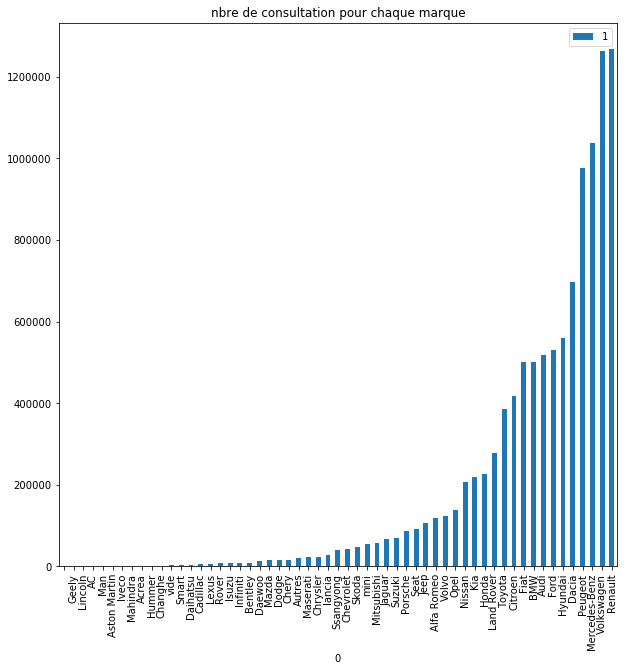

In [ ]:
s=pd.DataFrame(d_tri)
s.plot(kind='bar',x=0,y=1,figsize=(10,10),title='nbre de consultation pour chaque marque',legend=True);


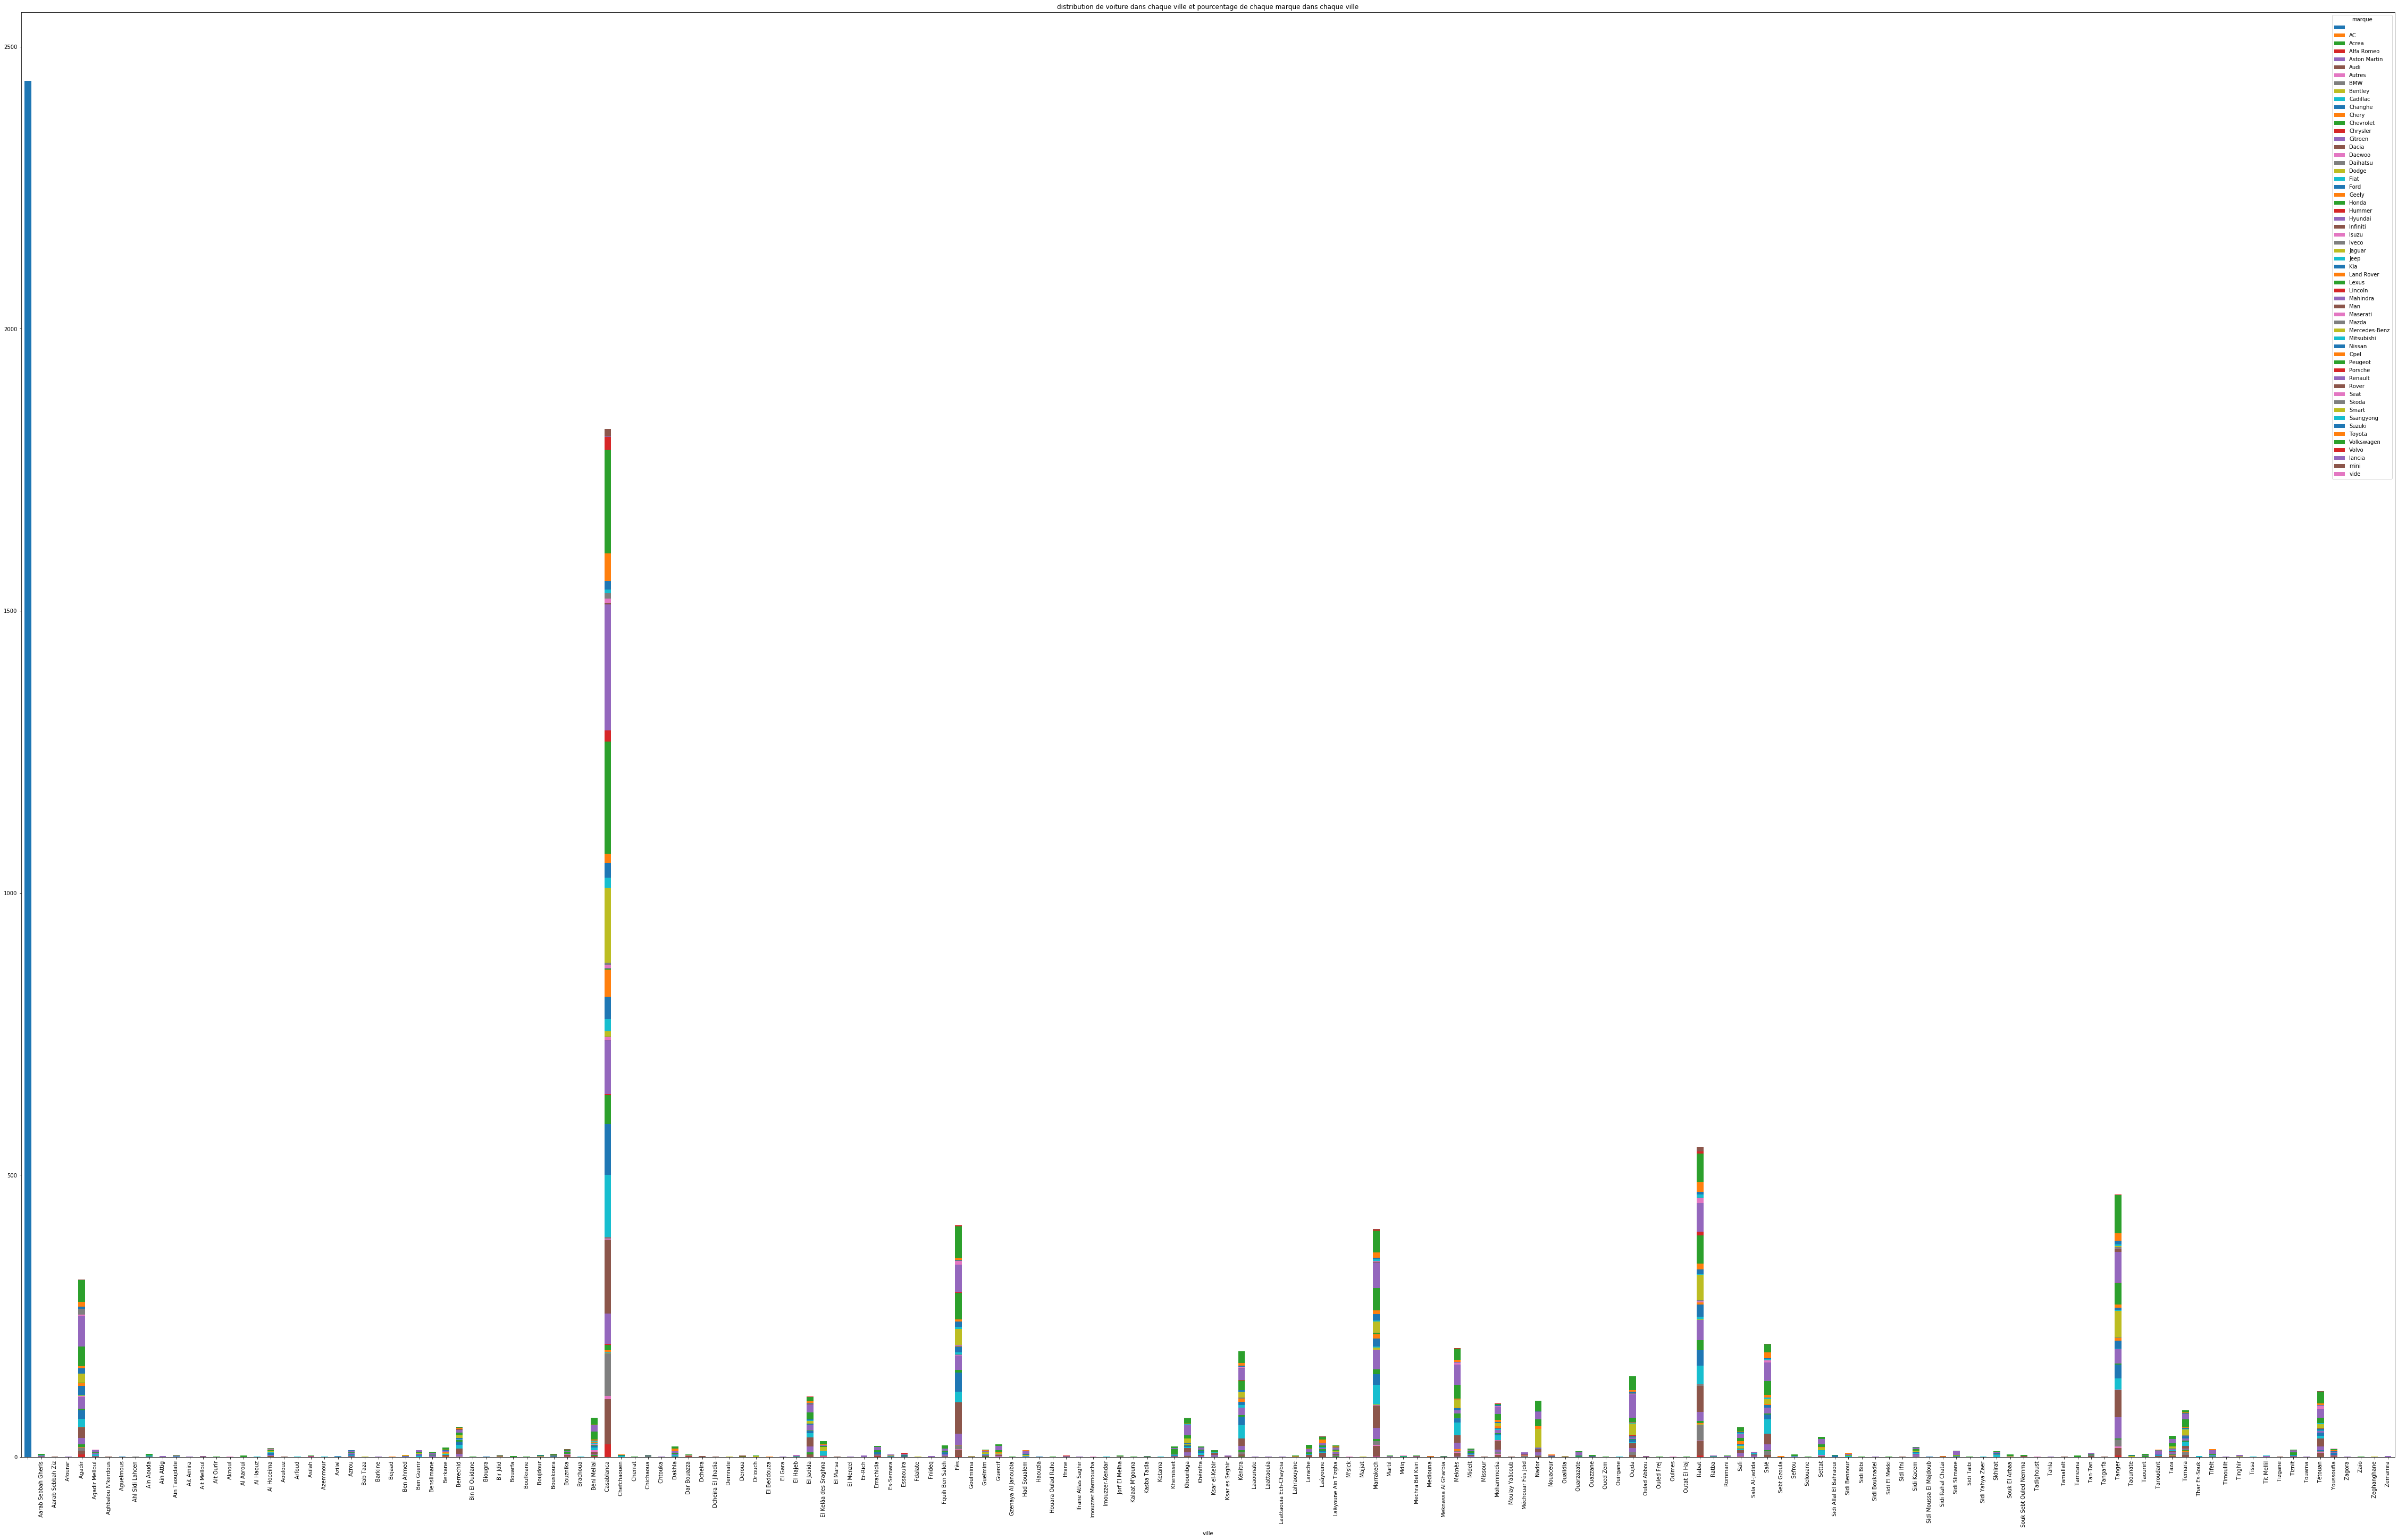

In [ ]:
df.groupby(['ville','marque'])['ville'].count().unstack().plot(kind='bar',stacked=True,figsize=(80,50),title='distribution de voiture dans chaque ville et pourcentage de chaque marque dans chaque ville',legend=True)
plt.show()

Text(0.5, 0, 'Marques')

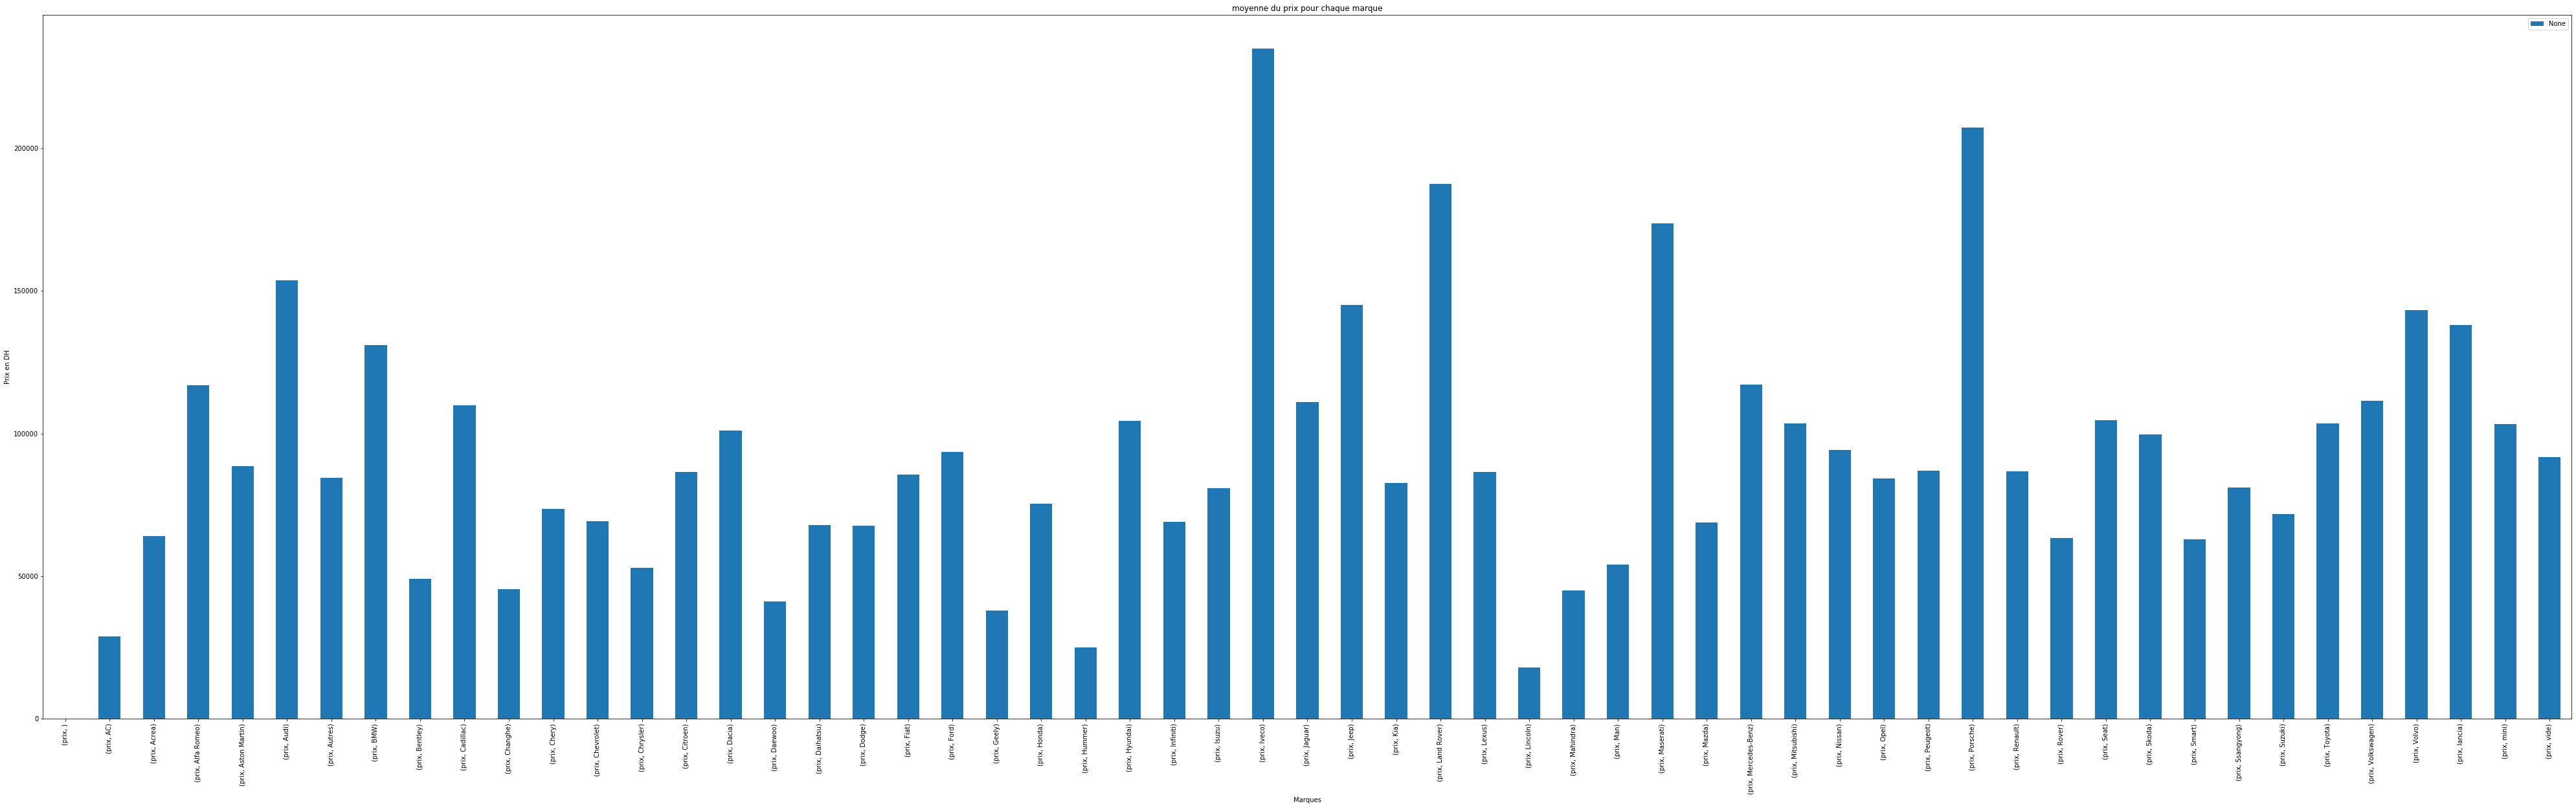

In [ ]:
fig=plt.figure(figsize=(70,20))
ax = fig.add_subplot(1, 1, 1)
moy=df.groupby(['marque'])['prix'].mean()
moy.to_frame().unstack().plot(kind='bar',stacked=True,legend=True,figsize=(70,20),title='moyenne du prix pour chaque marque')
ax.set_ylabel("Prix en DH")
ax.set_xlabel('Marques')

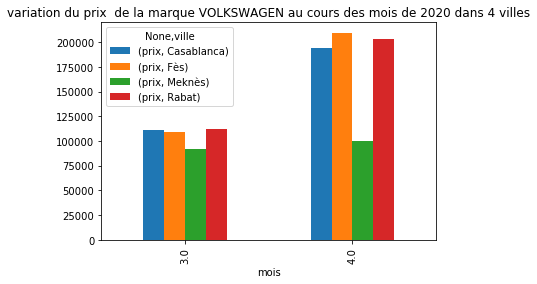

In [ ]:
df['ville']=df['ville'].str.replace(' ','')
f_ville=df.loc[np.where(df['ville'].isin(['Fès','Casablanca','Meknès','Rabat']))]
f_v_w=f_ville[f_ville['marque']=='Volkswagen']
da=f_v_w.groupby(['mois','ville'])['prix'].mean().to_frame()
l=da.unstack()
l.plot.bar(title="variation du prix  de la marque VOLKSWAGEN au cours des mois de 2020 dans 4 villes",legend=True )

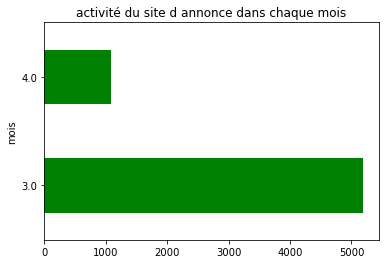

In [ ]:
df.groupby('mois').count()['ville'].plot.barh(legend=False,title='activité du site d annonce dans chaque mois',color='g');